In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import diabetes dataset from path
diabetes = pd.read_csv('/Users/sayanasabu/Downloads/diabetes.csv')

In [4]:
# print head
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
# import train_test_split
from sklearn.model_selection import train_test_split
# set X equal to all of the feature values
X = diabetes.to_numpy()
# remove 'Outcome' column from variable X
X = np.delete(X, 8, 1)
# set y equal to the value of the 'Outcome' column
y = diabetes['Outcome'].to_numpy()
# create train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# print shape of train and test set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [6]:
# normalize the features
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Logistic Regression
# Logistic Regression using scikit-learn
from sklearn.linear_model import LogisticRegression
# fit model based on training data
log_reg = LogisticRegression(random_state=0).fit(X_train, y_train)
# y_hat = our predictions based on X_test on the model learned from training data
y_hat = log_reg.predict(X_test)

In [8]:
print('---------ACTUAL OUTCOME VALUES---------')
print(y_test)

---------ACTUAL OUTCOME VALUES---------
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]


In [9]:
print('--------PREDICTED OUTCOME VALUES--------')
print(y_hat)

--------PREDICTED OUTCOME VALUES--------
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [10]:
# print metrics
from sklearn import metrics
print('-----------METRICS-----------')
print('Accuracy score:', metrics.accuracy_score(y_test, y_hat))
print('Precision score:', metrics.precision_score(y_test, y_hat))
print('Recall score:', metrics.recall_score(y_test, y_hat))
print('F1 score:', metrics.f1_score(y_test, y_hat))
print('ROC-AUC score:', metrics.roc_auc_score(y_test, y_hat))
print('PR score:', metrics.average_precision_score(y_test,y_hat))

-----------METRICS-----------
Accuracy score: 0.8246753246753247
Precision score: 0.7631578947368421
Recall score: 0.6170212765957447
F1 score: 0.6823529411764706
ROC-AUC score: 0.7664545635315172
PR score: 0.5877677753377641


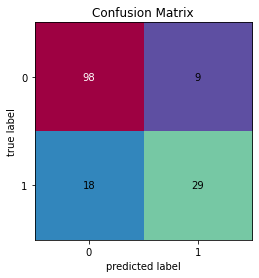

In [11]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, cmap='Spectral_r')
plt.title('Confusion Matrix')
plt.show()

# Alternate method to find metric scores:

In [12]:
# set to probability of the class most likely to be the correct one
y_prob = log_reg.predict_proba(X_test)[:,1]
# convert to numpy array
y_prob = np.array(y_prob)
# thresholds array
thresholds = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

# new values to calculate based on the threshold values
true_pos = 0
true_neg = 0
false_pos = 0
false_neg = 0

# array to store roc values
roc_vals = []
# array to store prec-recall values
pr_vals = []
# array to store f1 scores
f1_vals = []

In [13]:
# loop through threshold array
# simultaneously calculate values for tpr, fpr (needed for ROC curve) and precision, recall (needed for PR curve)
for t in thresholds:
    for i in range(len(y_test)):
        # if probability is greater than threshold
        if y_prob[i] >= t:
            # predict 1
            pred = 1
        else:
            # else predict 0
            pred = 0

        # calculations for tp, fn, fp, tn
        if pred == 1 and y_test[i] == 1:
            true_pos += 1
        elif pred == 0 and y_test[i] == 1:
            false_neg += 1
        elif pred == 1 and y_test[i] == 0:
            false_pos += 1
        elif pred == 0 and y_test[i] == 0:
            true_neg += 1

    # true positive rate calculation
    tpr = true_pos / (true_pos + false_neg)
    # false positive rate calculation
    fpr = false_pos / (true_neg + false_pos)

    # precision calculation
    prec = true_pos / (true_pos + false_pos)
    # recall calculation
    rec = true_pos / (true_pos + false_neg)

    # append fpr, tpr values to the roc array
    roc_vals.append([fpr, tpr])
    # append rec, prec values to the pr array
    pr_vals.append([rec, prec])
    # append f1 score to the f1 array
    f1_vals.append((2*prec*rec)/(prec+rec))


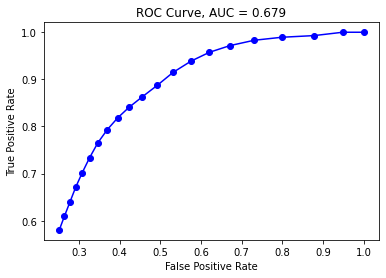

In [14]:
from sklearn.metrics import auc

# data frame to store roc values
roc_graph = pd.DataFrame(roc_vals, columns=['X', 'y'])
# calculation of AUC-ROC
auc_of_roc = auc(roc_graph.X, roc_graph.y)
# plot the data frame
plt.plot(roc_graph.X, roc_graph.y, color='b', marker='o')
plt.title('ROC Curve, AUC = %.3f'%auc_of_roc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

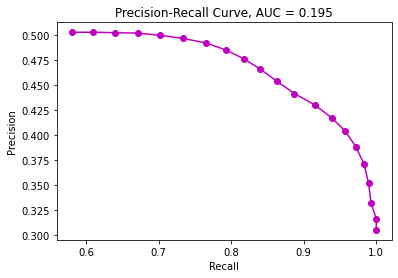

In [15]:
# data frame to store pr values
pr_graph = pd.DataFrame(pr_vals, columns=['X', 'y'])
# calculation of AUC-PR
auc_of_pr = auc(pr_graph.X, pr_graph.y)
# plot the data frame
plt.plot(pr_graph.X, pr_graph.y, color='m', marker='o')
plt.title('Precision-Recall Curve, AUC = %.3f'%auc_of_pr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [16]:
print('Best Threshold: t =', thresholds[np.argmax(f1_vals)], 'where F1 =', f1_vals[np.argmax(f1_vals)])

Best Threshold: t = 0.65 where F1 = 0.602076124567474


# Observations
Looping through a threshold array and plotting the AUC-ROC curve and the PR curve allowed me to optimize metrics other than accuracy, because it allowed for more datapoints to be correctly classified. 